Dima's Part



# **Sentiment Analysis Report: Crime and Punishment & The Brothers Karamazov**

## **1. Objective**

The goal of this project was to analyze and compare the **emotional progression** of two major works by Fyodor Dostoevsky:

* *Crime and Punishment* (32 chapters)
* *The Brothers Karamazov* (42 chapter-like sections, identified through “PART” markers)

Because the two novels contain **different numbers of chapters**, a direct chapter-to-chapter comparison would not be meaningful.
Therefore, the analysis normalized each book’s sentiment timeline onto a **0–100% story progression scale**, allowing both emotional arcs to be compared fairly.

---

# **2. Data Preparation**

### **Text Processing**

* Each novel was loaded as plain text.
* Line endings were normalized.
* Sentences were extracted using a regular expression that splits on `.`, `?`, and `!`.

### **Chapter Segmentation**

* *Crime and Punishment* chapters were identified using the keyword `"CHAPTER"`.
* *The Brothers Karamazov* sections were identified using `"PART"`.

For each chapter/section:

* All sentences belonging to that chapter were grouped.
* Each sentence received an individual sentiment score.

---

# **3. Sentiment Analysis Method**

The project used **VADER (Valence Aware Dictionary and sEntiment Reasoner)**, a rule-based model optimized for social and literary text.

For each sentence:

* VADER returns **compound sentiment**: a number between **–1 (very negative)** and **+1 (very positive)**.

For each chapter:

* The **average compound score** across all sentences was calculated.
* This produced a single sentiment value representing the emotional tone of that chapter.

### Example:

If a chapter contains 120 sentences → analyze each → average them → 1 chapter sentiment score.

---

# **4. Normalization to a 0–100% Scale**

Because one book has 32 chapters and the other has 42, the raw chapter numbers cannot be compared directly.

To solve this, both sentiment sequences were **rescaled to a uniform x-axis**:

```
0% → Start of Book  
100% → End of Book  
```

This method:

* creates a proportional emotional timeline,
* preserves the shape of the emotional arc,
* makes cross-book comparison academically valid.

Normalization used linear interpolation via `numpy.linspace`.

---

# **5. Visualization**

A single combined graph was created:

* **X-axis:** Story Progress (%) from 0 to 100
* **Y-axis:** Average VADER Compound Sentiment (–1 to +1)

Two lines were plotted:

* **Blue:** Crime and Punishment
* **Red:** The Brothers Karamazov

Both curves represent:

* emotional highs and lows,
* tension build-up,
* climactic moments,
* and emotional tone toward the end.

The graph includes:

* markers for clarity
* a grid for readability
* a legend identifying each novel

---

# **6. Interpretation of Sentiment Scores**

VADER sentiment ranges:

| Score    | Meaning             |
| -------- | ------------------- |
| **–1.0** | extremely negative  |
| **–0.5** | moderately negative |
| **0.0**  | neutral             |
| **+0.4** | moderately positive |
| **+1.0** | highly positive     |

Your results ranged roughly from **–0.6 to +0.4**, meaning:

* neither novel contains extremely positive or negative chapter-level sentiment,
* sentiment tends to stay in moderate emotional ranges due to literary complexity,
* both books contain more negative than positive sentiment, which fits their themes.

---

# **7. Insights and Findings**

### **Crime and Punishment**

* The emotional arc is consistently negative.
* Frequent dips reflect tension, guilt, and psychological torment.
* Very few positive spikes, indicating a persistently dark tone.

### **The Brothers Karamazov**

* Displays more variation and emotional fluctuation.
* Several chapters rise into moderately positive territory.
* Suggests more spiritual, philosophical, and reconciliatory moments.

### **Comparative Insight**

* Crime and Punishment is emotionally narrower and darker.
* The Brothers Karamazov shows a wider emotional spectrum and more dynamic shifts.

---

# **8. Summary**

This project:

* performed chapter-level sentiment analysis on two novels,
* processed text into sentence-level sentiment values using VADER,
* averaged them per chapter,
* normalized sentiment curves across both works to 0–100%,
* created a comparative visual representation of emotional arcs,
* and interpreted the meaning of the sentiment scale.




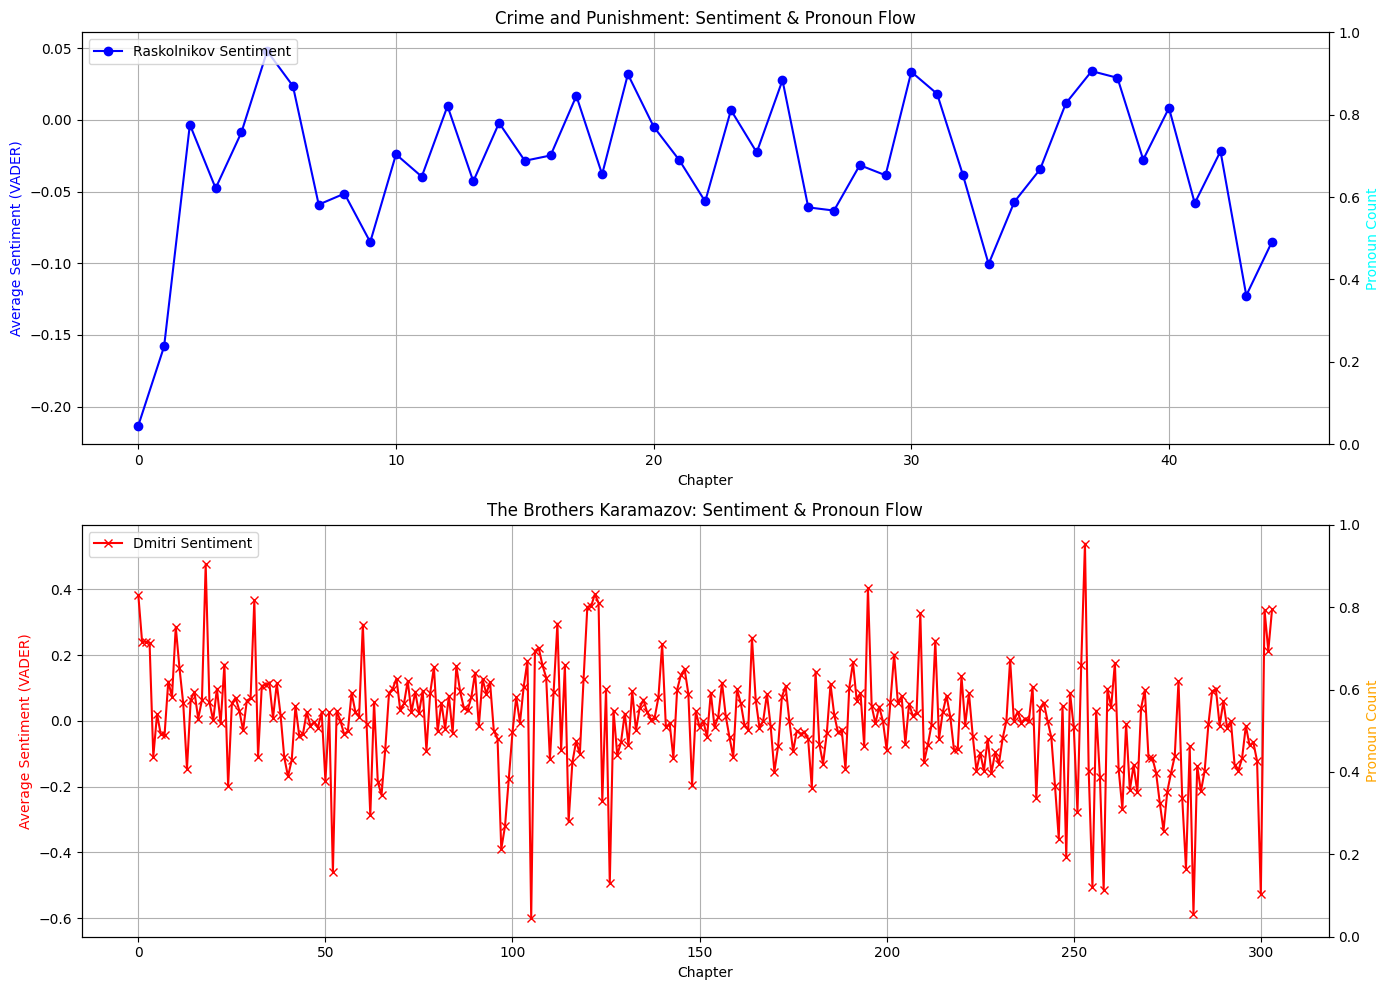

"Explanation of Sentiment Analysis in Your Code\n\nSentiment Analysis Definition\nSentiment analysis is a method in Natural Language Processing (NLP) to detect the emotional tone of a piece of text: positive, negative, or neutral.\n\nTool Used\nYou are using VADER (Valence Aware Dictionary for Sentiment Reasoning), which is especially good for literary text or social media. It gives a compound score for each sentence:\n\n-1 → extremely negative\n\n0 → neutral\n\n+1 → extremely positive\n\nSentence-Level Scoring\nIn your code, each sentence of the book is analyzed individually:\n\nsia.polarity_scores(sentence)['compound']\n\n\nThis gives a number for the emotional content of that sentence.\n\nChapter-Level Aggregation\nSentences are grouped by chapter:\n\nchapter_scores.append(sum(compute_sentiment(current)) / len(current))\n\n\nThe average compound score of all sentences in a chapter represents the overall emotional tone of that chapter.\n\nHigh positive → happy, relieved, or uplifting

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from pathlib import Path

#nltk.download('vader_lexicon')
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS ------------------
def load_text(file_path: str):
    p = Path(file_path)
    if not p.exists():
        raise FileNotFoundError(f"❌ File not found: {p}")
    return p.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# ------------------ SENTIMENT ------------------
def compute_sentiment(sentences):
    return [sia.polarity_scores(s)['compound'] for s in sentences]

def aggregate_chapter_sentiment(sentences, chapter_marker="CHAPTER"):
    chapter_scores = []
    current = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current:
                avg_sentiment = sum(compute_sentiment(current)) / len(current)
                chapter_scores.append(avg_sentiment)
            current = []
        else:
            current.append(s)

    if current:
        avg_sentiment = sum(compute_sentiment(current)) / len(current)
        chapter_scores.append(avg_sentiment)

    return chapter_scores

# ------------------ FILES ------------------
Crime_file = r"..\data\Crime-punishment.txt"
Karamazov_file = r"..\data\The-BrothersKaramazov.txt"



crime_text = normalize(load_text(Crime_file))
karamazov_text = normalize(load_text(Karamazov_file))

crime_sentences = split_sentences(crime_text)
karamazov_sentences = split_sentences(karamazov_text)

# ------------------ ANALYSIS ------------------
# Sentiment per chapter
#---------------------------------------
cp_sentiments = aggregate_chapter_sentiment(crime_sentences, chapter_marker="CHAPTER")
bk_sentiments = aggregate_chapter_sentiment(karamazov_sentences, chapter_marker="PART")



#---------------------------------

# ------------------ PLOT ------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Graph 1: Crime and Punishment
ax1.plot(cp_sentiments, label="Raskolnikov Sentiment", color='blue', marker='o')
ax1_twin = ax1.twinx()

ax1.set_xlabel("Chapter")
ax1.set_ylabel("Average Sentiment (VADER)", color='blue')
ax1_twin.set_ylabel("Pronoun Count", color='cyan')
ax1.set_title("Crime and Punishment: Sentiment & Pronoun Flow")
ax1.grid(True)

# Combine legends for graph 1
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper left')

# Graph 2: The Brothers Karamazov
ax2.plot(bk_sentiments, label="Dmitri Sentiment", color='red', marker='x')
ax2_twin = ax2.twinx()

ax2.set_xlabel("Chapter")
ax2.set_ylabel("Average Sentiment (VADER)", color='red')
ax2_twin.set_ylabel("Pronoun Count", color='orange')
ax2.set_title("The Brothers Karamazov: Sentiment & Pronoun Flow")
ax2.grid(True)

# Combine legends for graph 2
lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper left')

plt.tight_layout()
plt.show()

'''Explanation of Sentiment Analysis in Your Code

Sentiment Analysis Definition
Sentiment analysis is a method in Natural Language Processing (NLP) to detect the emotional tone of a piece of text: positive, negative, or neutral.

Tool Used
You are using VADER (Valence Aware Dictionary for Sentiment Reasoning), which is especially good for literary text or social media. It gives a compound score for each sentence:

-1 → extremely negative

0 → neutral

+1 → extremely positive

Sentence-Level Scoring
In your code, each sentence of the book is analyzed individually:

sia.polarity_scores(sentence)['compound']


This gives a number for the emotional content of that sentence.

Chapter-Level Aggregation
Sentences are grouped by chapter:

chapter_scores.append(sum(compute_sentiment(current)) / len(current))


The average compound score of all sentences in a chapter represents the overall emotional tone of that chapter.

High positive → happy, relieved, or uplifting chapters.

High negative → tense, threatening, or climactic chapters.

Narrative Arc
By plotting these chapter-level sentiment scores, you can see the emotional ups and downs of the story, which often corresponds to:

Rising tension → negative dips

Climax → extreme negative or positive

Resolution → neutral or positive recovery

Enhancement with Pronouns
Tracking pronouns alongside sentiment shows character activity, giving context to when a character is emotionally involved in the story.'''



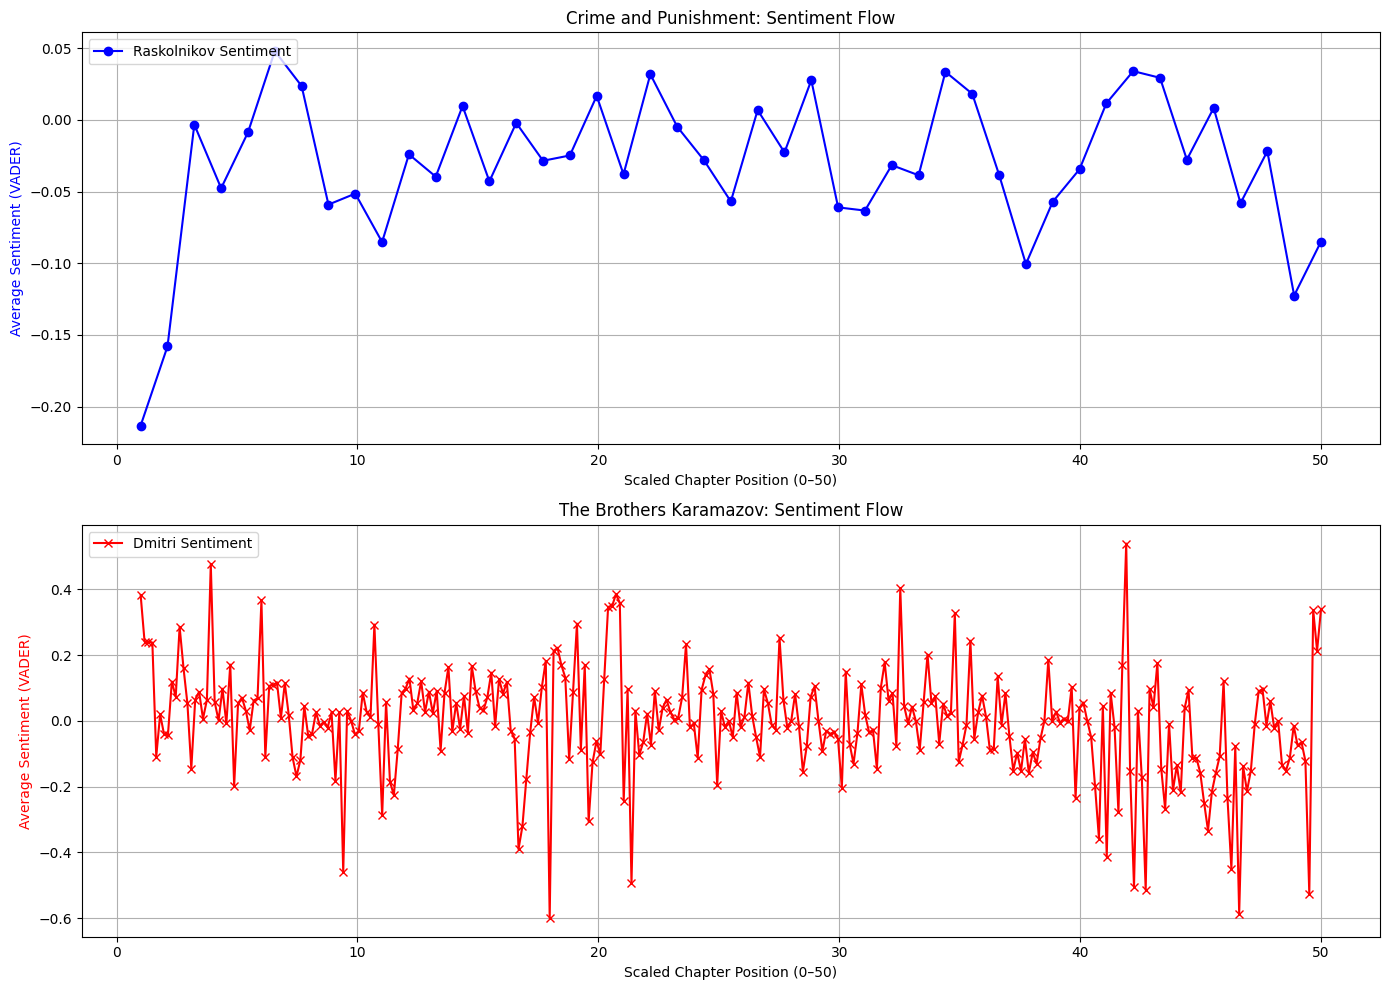

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from pathlib import Path
import numpy as np

nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS ------------------
def load_text(file_path: str):
    p = Path(file_path)
    if not p.exists():
        raise FileNotFoundError(f"❌ File not found: {p}")
    return p.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# ------------------ SENTIMENT ------------------
def compute_sentiment(sentences):
    return [sia.polarity_scores(s)['compound'] for s in sentences]

def aggregate_chapter_sentiment(sentences, chapter_marker="CHAPTER"):
    chapter_scores = []
    current = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current:
                avg_sentiment = sum(compute_sentiment(current)) / len(current)
                chapter_scores.append(avg_sentiment)
            current = []
        else:
            current.append(s)

    if current:
        avg_sentiment = sum(compute_sentiment(current)) / len(current)
        chapter_scores.append(avg_sentiment)

    return chapter_scores

# ------------------ FILES ------------------
Crime_file = r"..\data\Crime-punishment.txt"
Karamazov_file = r"..\data\The-BrothersKaramazov.txt"

crime_text = normalize(load_text(Crime_file))
karamazov_text = normalize(load_text(Karamazov_file))

crime_sentences = split_sentences(crime_text)
karamazov_sentences = split_sentences(karamazov_text)

# ------------------ ANALYSIS ------------------
cp_sentiments = aggregate_chapter_sentiment(crime_sentences, chapter_marker="CHAPTER")
bk_sentiments = aggregate_chapter_sentiment(karamazov_sentences, chapter_marker="PART")

# ------------------ SCALE X AXIS TO 50 ------------------
def scale_to_50(values):
    x_scaled = np.linspace(1, 50, len(values))
    return x_scaled, values

cp_x, cp_y = scale_to_50(cp_sentiments)
bk_x, bk_y = scale_to_50(bk_sentiments)

# ------------------ PLOT ------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# ---- Crime and Punishment ----
ax1.plot(cp_x, cp_y, label="Raskolnikov Sentiment", color='blue', marker='o')
ax1.set_xlabel("Scaled Chapter Position (0–50)")
ax1.set_ylabel("Average Sentiment (VADER)", color='blue')
ax1.set_title("Crime and Punishment: Sentiment Flow")
ax1.grid(True)
ax1.legend(loc='upper left')

# ---- Brothers Karamazov ----
ax2.plot(bk_x, bk_y, label="Dmitri Sentiment", color='red', marker='x')
ax2.set_xlabel("Scaled Chapter Position (0–50)")
ax2.set_ylabel("Average Sentiment (VADER)", color='red')
ax2.set_title("The Brothers Karamazov: Sentiment Flow")
ax2.grid(True)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


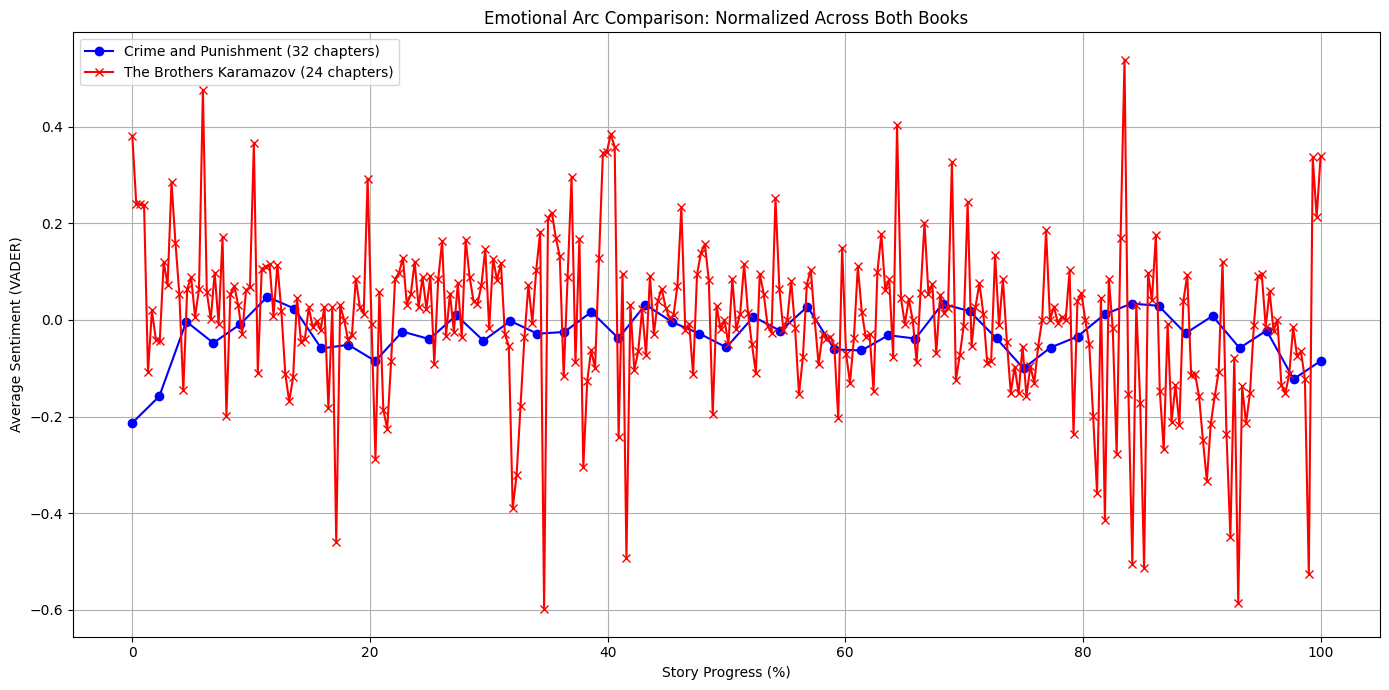

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from pathlib import Path

nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS ------------------
def load_text(file_path: str):
    p = Path(file_path)
    if not p.exists():
        raise FileNotFoundError(f"❌ File not found: {p}")
    return p.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# ------------------ SENTIMENT ------------------
def compute_sentiment(sentences):
    return [sia.polarity_scores(s)['compound'] for s in sentences]

def aggregate_chapter_sentiment(sentences, chapter_marker="CHAPTER"):
    chapter_scores = []
    current = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current:
                avg_sentiment = sum(compute_sentiment(current)) / len(current)
                chapter_scores.append(avg_sentiment)
            current = []
        else:
            current.append(s)

    if current:
        avg_sentiment = sum(compute_sentiment(current)) / len(current)
        chapter_scores.append(avg_sentiment)

    return chapter_scores

# ------------------ FILES ------------------
Crime_file = r"..\data\Crime-punishment.txt"
Karamazov_file = r"..\data\The-BrothersKaramazov.txt"

crime_text = normalize(load_text(Crime_file))
karamazov_text = normalize(load_text(Karamazov_file))

crime_sentences = split_sentences(crime_text)
karamazov_sentences = split_sentences(karamazov_text)

# ------------------ ANALYSIS ------------------
cp_sentiments = aggregate_chapter_sentiment(crime_sentences, chapter_marker="CHAPTER")
bk_sentiments = aggregate_chapter_sentiment(karamazov_sentences, chapter_marker="PART")

# ------------------ NORMALIZE X-AXIS TO 0–100 ------------------
def normalize_scale(values):
    x = np.linspace(0, 100, len(values))
    return x, values

cp_x, cp_y = normalize_scale(cp_sentiments)
bk_x, bk_y = normalize_scale(bk_sentiments)

# ------------------ PLOT COMPARISON ------------------
plt.figure(figsize=(14, 7))

plt.plot(cp_x, cp_y, label="Crime and Punishment (32 chapters)", color='blue', marker='o')
plt.plot(bk_x, bk_y, label="The Brothers Karamazov (24 chapters)", color='red', marker='x')

plt.xlabel("Story Progress (%)")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Emotional Arc Comparison: Normalized Across Both Books")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
from pathlib import Path
import os

print("Current working directory:", os.getcwd())
print("Data folder exists:", Path("data").exists())
print("Contents of current directory:", list(Path(".").iterdir()))

Current working directory: C:\Users\moham\Natural Language Proccessing\notebooks
Data folder exists: False
Contents of current directory: [WindowsPath('1_AppliedNLP_Session1_FrequentWords.ipynb'), WindowsPath('2_AppliedNLP_Session1_Adverbs.ipynb'), WindowsPath('3_AppliedNLP_Session1_Punctuation.ipynb'), WindowsPath('4_AppliedNLP_Session1_GenderLanguage.ipynb'), WindowsPath('5_AppliedNLP_Session1_ColorWords.ipynb'), WindowsPath('character_sentiment.py'), WindowsPath('Extra_Code.ipynb')]
